In [100]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [124]:
star_wars.head(10)
character_name=[];

for item in range(15,29):
    character_name.append(star_wars.iloc[0,item]);

In [125]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [126]:
star_wars=star_wars[star_wars['RespondentID'].notnull()];

In [127]:
yes_no = {
    "Yes": True,
    "No": False
}


In [128]:
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"]=star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no);

In [129]:
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"]=star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no);

In [130]:
import numpy as np
movie_map = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

In [131]:
for col in star_wars.columns[3:9]:
    star_wars[col]=star_wars[col].map(movie_map);
    #print(star_wars[col]);

In [132]:
star_wars = star_wars.rename(columns={
    star_wars.columns[3]: "seen_1",
    star_wars.columns[4]: "seen_2",
    star_wars.columns[5]: "seen_3",
    star_wars.columns[6]: "seen_4",
    star_wars.columns[7]: "seen_5",
    star_wars.columns[8]: "seen_6",
})

In [133]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [134]:
star_wars = star_wars.rename(columns={
    star_wars.columns[9]: "ranking_1",
    star_wars.columns[10]: "ranking_2",
    star_wars.columns[11]: "ranking_3",
    star_wars.columns[12]: "ranking_4",
    star_wars.columns[13]: "ranking_5",
    star_wars.columns[14]: "ranking_6",
})

In [135]:
star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

<Container object of 6 artists>

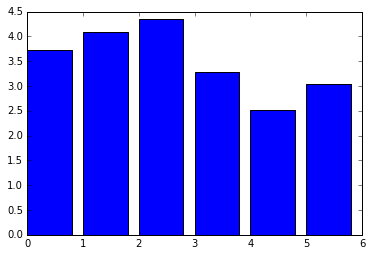

In [136]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(range(6),height=star_wars[star_wars.columns[9:15]].mean())

<Container object of 6 artists>

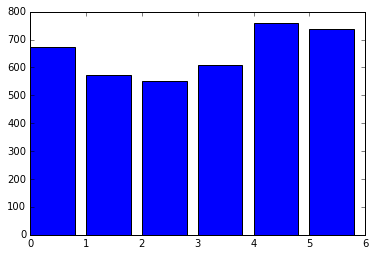

In [137]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(range(6),height=star_wars[star_wars.columns[3:9]].sum())

In [138]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]
fan_startrek = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "Yes"]
nonfan_startrek = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "No"]
fan_starwar = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == True]
nonfan_starwar = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False]

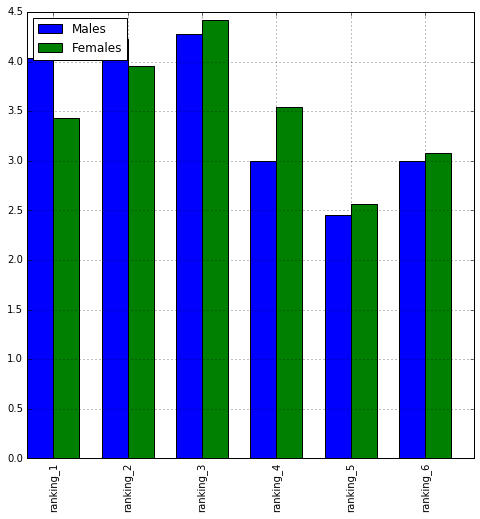

In [139]:
fig = plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
import numpy as np;
locs=np.arange(6)
bar_1=ax.bar(left=locs,height=males[males.columns[9:15]].mean().tolist(),width=0.35);

offset_locs=locs+0.35;
bar_2=ax.bar(left=offset_locs,height=females[females.columns[9:15]].mean().tolist(),width=0.35,color="green");

ax.set_xticklabels(males.columns[9:15].tolist(),rotation=90);
ax.set_xticks(offset_locs);
plt.legend((bar_1, bar_2), ("Males", "Females"), loc="upper left");
plt.grid();

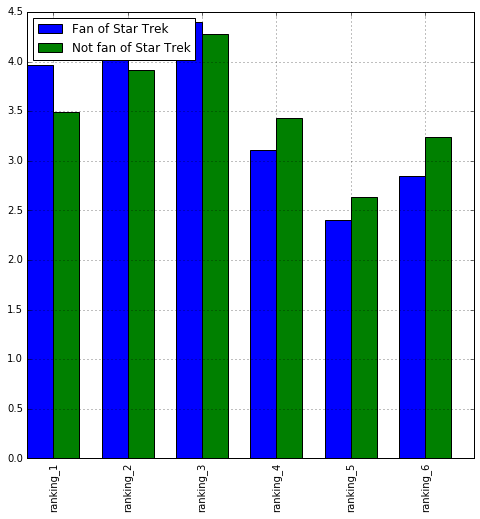

In [140]:
fig = plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
import numpy as np;
locs=np.arange(6)
bar_1=ax.bar(left=locs,height=fan_startrek[fan_startrek.columns[9:15]].mean().tolist(),width=0.35);

offset_locs=locs+0.35;
bar_2=ax.bar(left=offset_locs,height=nonfan_startrek[nonfan_startrek.columns[9:15]].mean().tolist(),width=0.35,color="green");

ax.set_xticklabels(fan_startrek.columns[9:15].tolist(),rotation=90);
ax.set_xticks(offset_locs);
plt.legend((bar_1, bar_2), ("Fan of Star Trek", "Not fan of Star Trek"), loc="upper left");
plt.grid();

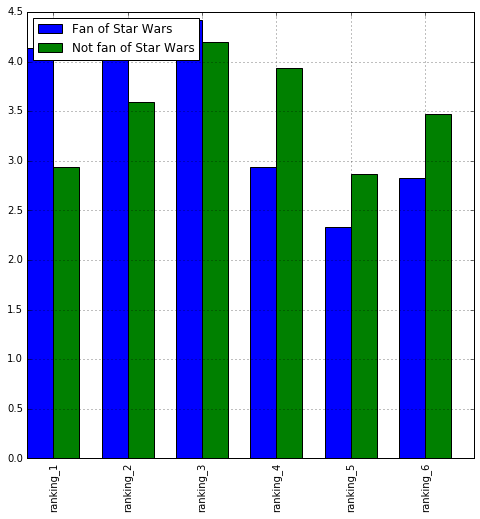

In [141]:
fig = plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
import numpy as np;
locs=np.arange(6)
bar_1=ax.bar(left=locs,height=fan_starwar[fan_starwar.columns[9:15]].mean().tolist(),width=0.35);

offset_locs=locs+0.35;
bar_2=ax.bar(left=offset_locs,height=nonfan_starwar[nonfan_starwar.columns[9:15]].mean().tolist(),width=0.35,color="green");

ax.set_xticklabels(fan_starwar.columns[9:15].tolist(),rotation=90);
ax.set_xticks(offset_locs);
plt.legend((bar_1, bar_2), ("Fan of Star Wars", "Not fan of Star Wars"), loc="upper left");
plt.grid();

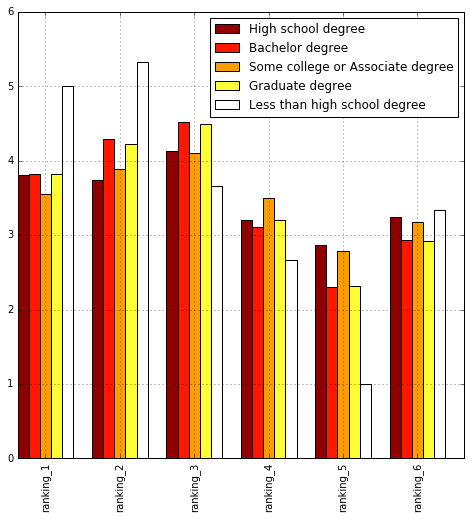

In [142]:
import matplotlib.cm as cm
from matplotlib.colors import Normalize

# get a color map
my_cmap = cm.get_cmap('hot')

fig = plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)

cleanedList = [x for x in star_wars['Education'].unique() if str(x) != 'nan']
locs=np.arange(6)
counter=0;

for item in cleanedList:
    counter=counter+1;
    data = star_wars[star_wars["Education"] == item];
    ax.bar(left=locs,height=data[data.columns[9:15]].mean().tolist(),width=0.15,color=my_cmap(counter/5),label=item);
    locs=locs+0.15;

ax.set_xticklabels(data.columns[9:15].tolist(),rotation=90);
ax.set_xticks(locs-counter/2*0.15);
ax.legend();
#plt.legend((bar_1, bar_2), ("Fan of Star Trek", "Not fan of Star Trek"), loc="upper left");
plt.grid();


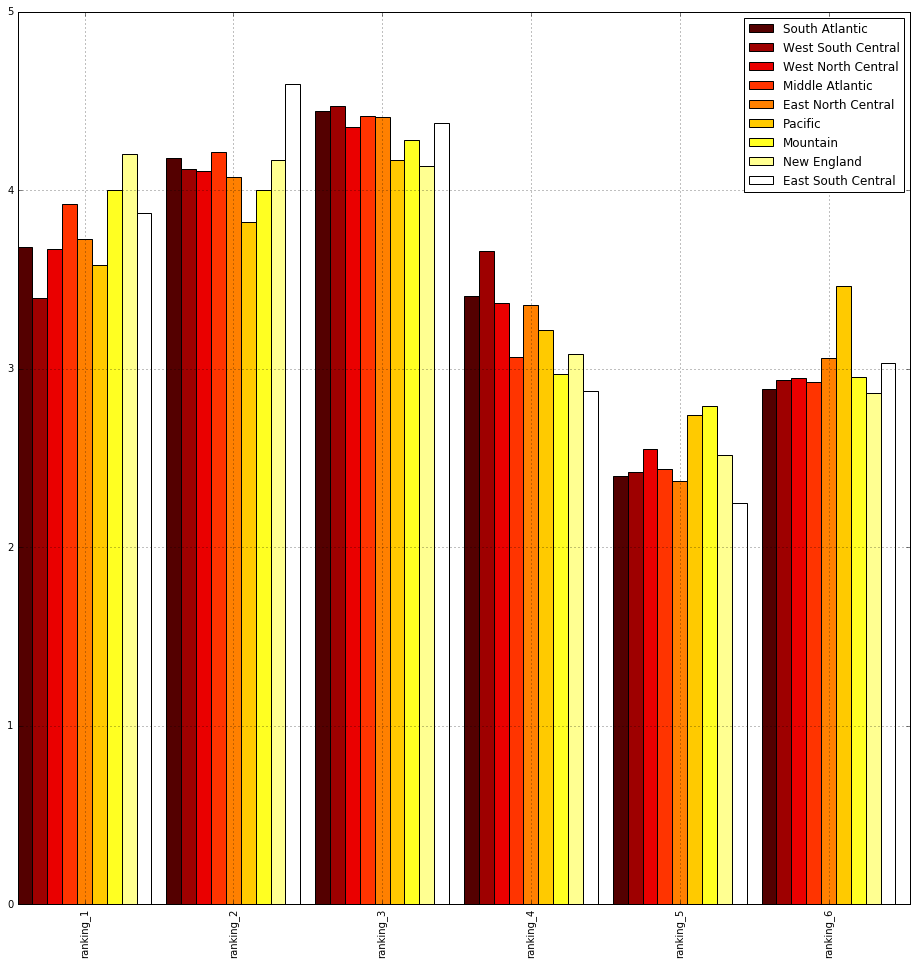

In [143]:
import matplotlib.cm as cm
from matplotlib.colors import Normalize

# get a color map
my_cmap = cm.get_cmap('hot')

fig = plt.figure(figsize=(16,16))
ax=fig.add_subplot(1,1,1)

cleanedList = [x for x in star_wars['Location (Census Region)'].unique() if str(x) != 'nan']
locs=np.arange(6)
counter=0;

bar_thickness=1/(len(cleanedList)+1);

for item in cleanedList:
    counter=counter+1;
    data = star_wars[star_wars["Location (Census Region)"] == item];
    ax.bar(left=locs,height=data[data.columns[9:15]].mean().tolist(),width=bar_thickness,color=my_cmap(counter/len(cleanedList)),label=item);
    locs=locs+bar_thickness;

ax.set_xticklabels(data.columns[9:15].tolist(),rotation=90);
ax.set_xticks(locs-counter/2*bar_thickness);
ax.legend();
#plt.legend((bar_1, bar_2), ("Fan of Star Trek", "Not fan of Star Trek"), loc="upper left");
plt.grid();


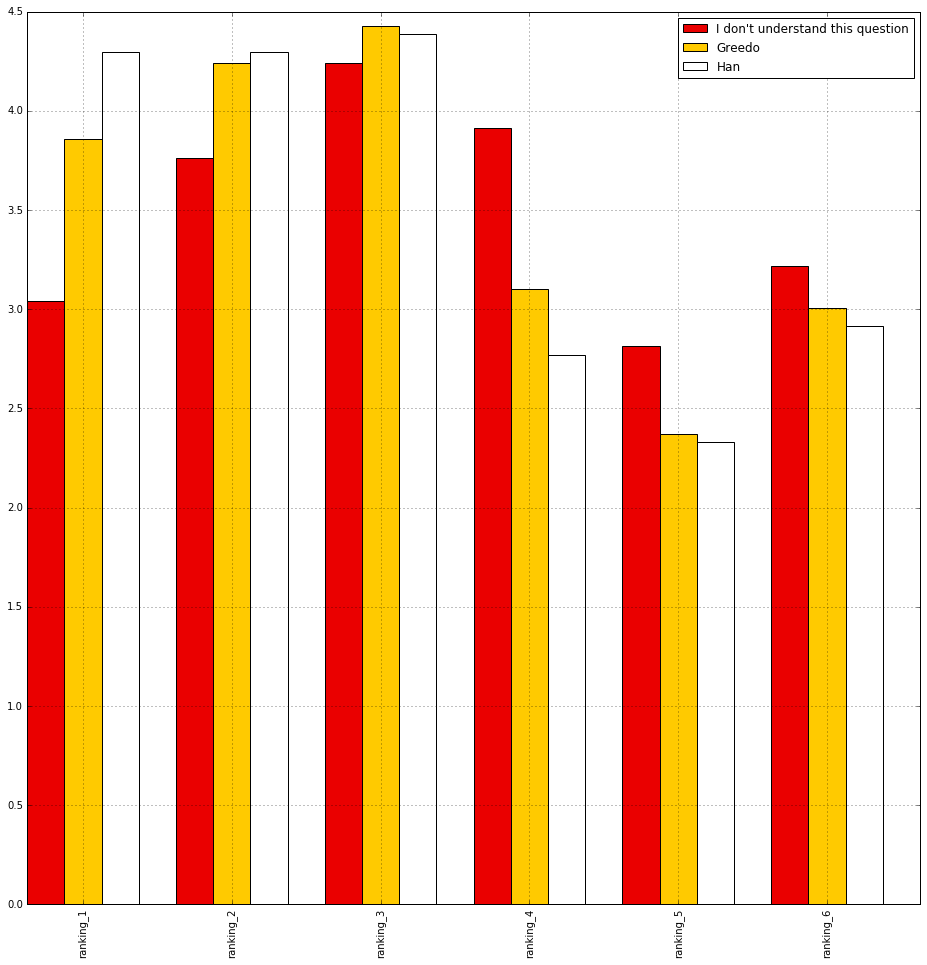

In [144]:
import matplotlib.cm as cm
from matplotlib.colors import Normalize

# get a color map
my_cmap = cm.get_cmap('hot')

fig = plt.figure(figsize=(16,16))
ax=fig.add_subplot(1,1,1)

cleanedList = [x for x in star_wars['Which character shot first?'].unique() if str(x) != 'nan']
locs=np.arange(6)
counter=0;

bar_thickness=1/(len(cleanedList)+1);

for item in cleanedList:
    counter=counter+1;
    data = star_wars[star_wars["Which character shot first?"] == item];
    ax.bar(left=locs,height=data[data.columns[9:15]].mean().tolist(),width=bar_thickness,color=my_cmap(counter/len(cleanedList)),label=item);
    locs=locs+bar_thickness;

ax.set_xticklabels(data.columns[9:15].tolist(),rotation=90);
ax.set_xticks(locs-counter/2*bar_thickness);
ax.legend();
#plt.legend((bar_1, bar_2), ("Fan of Star Trek", "Not fan of Star Trek"), loc="upper left");
plt.grid();


In [157]:
character_related=star_wars[star_wars.columns[15:29]];
character_names=character_related.head(2)

In [159]:
character_related.columns=character_name;

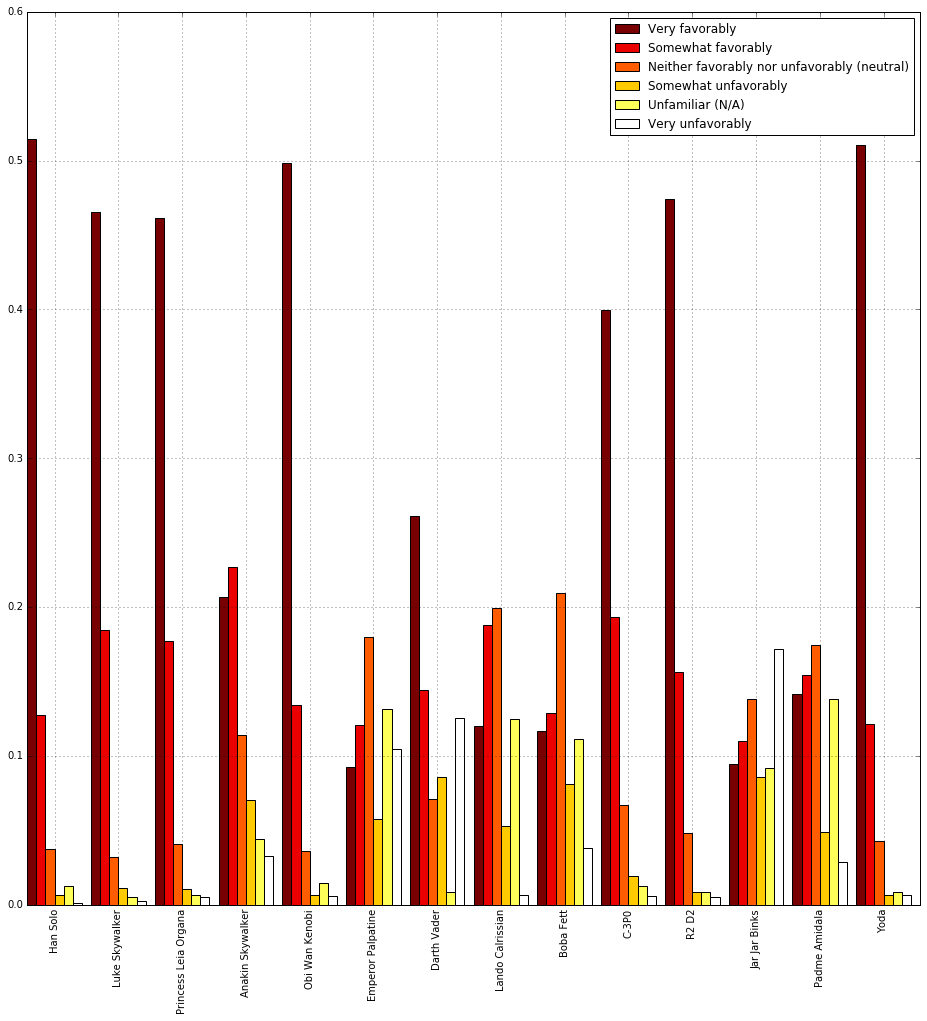

In [196]:
import matplotlib.cm as cm
from matplotlib.colors import Normalize

# get a color map
my_cmap = cm.get_cmap('hot')

fig = plt.figure(figsize=(16,16))
ax=fig.add_subplot(1,1,1)

# Get the list of possible responses
cleanedList = [x for x in character_related[character_name[0]].unique() if str(x) != 'nan'];
#print(cleanedList);
locs=np.arange(29-15)
counter=0;

bar_thickness=1/(len(cleanedList)+1);

for item in cleanedList:
    counter=counter+1;
    
    data=[]
    for col in character_related.columns:
        #print(character_related[col]);
        #print(item);
        data.append(len(character_related[character_related[col] == item])/character_related.shape[0]);
        #print(data);    
    ax.bar(left=locs,height=data,width=bar_thickness,color=my_cmap(counter/len(cleanedList)),label=item);
    locs=locs+bar_thickness;

ax.set_xticklabels(character_name,rotation=90);
ax.set_xticks(locs-counter/2*bar_thickness);
ax.legend();
plt.grid();

['Han Solo', 'Luke Skywalker', 'Princess Leia Organa', 'Anakin Skywalker', 'Obi Wan Kenobi', 'Emperor Palpatine', 'Darth Vader', 'Lando Calrissian', 'Boba Fett', 'C-3P0', 'R2 D2', 'Jar Jar Binks', 'Padme Amidala', 'Yoda']
